In [1]:
from __future__ import annotations
from os import PathLike
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import bs4
import urllib.request

c:\users\schba\appdata\local\programs\python\python39\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


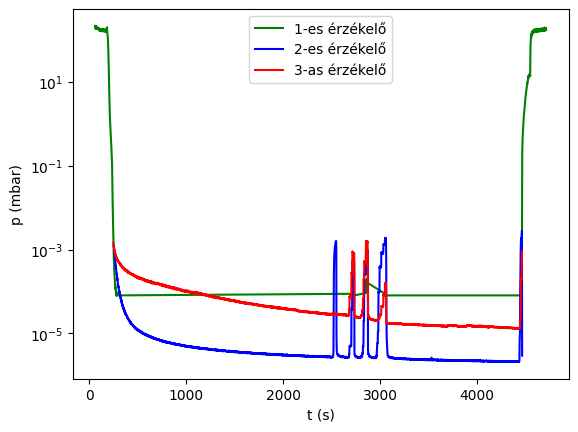

In [2]:
def tablegen(name: str | bytes | PathLike[str] | PathLike[bytes] | int, offset: int | float = 0):
    log = bs4.BeautifulSoup(open(name), 'lxml')
    table = log.table
    rows = table.find_all('row')
    out = []
    t0 = -1
    for tr in rows:
        t = tr.find_all('t')
        t = str([i.text for i in t][0])
        t = sum(x * int(t) for x, t in zip([3600, 60, 1], t.split(":")))
        if t0 == -1: t0 = t+offset
        p = tr.find_all('p')
        try:
            p = float([i.text for i in p][0])
            out.append([t, p])
        except ValueError:
            p = None

    out = np.array(out)
    out[:,0] = out[:,0]-t0
    return np.array([out[:,0], out[:,1]])

log1 = tablegen("VrGauges1.log")
log2 = tablegen("VrGauges2.log", -2)
log3 = tablegen("VrGauges3.log")

fig, ax = plt.subplots()
ax.semilogy(log1[0], log1[1], 'g-',label="1-es érzékelő")
ax.semilogy(log2[0], log2[1], 'b-', label="2-es érzékelő")
ax.semilogy(log3[0], log3[1], 'r-', label="3-as érzékelő")
ax.set_xlabel(r't (s)')
ax.set_ylabel(r'p (mbar)')
ax.legend()
plt.show()

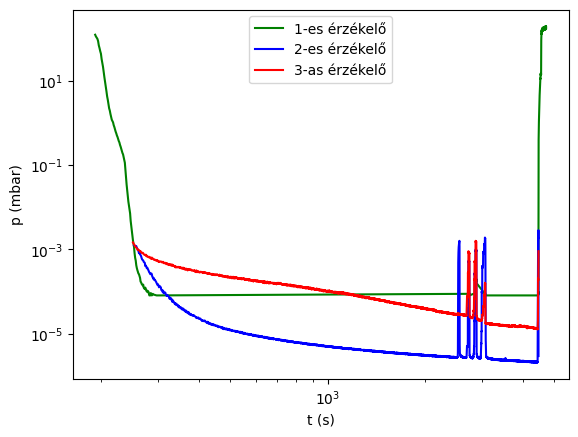

In [4]:
fig, ax = plt.subplots()
ax.loglog(log1[0, log1[0]>190], log1[1, log1[0]>190], 'g-',label="1-es érzékelő")
ax.loglog(log2[0, log2[0]>190], log2[1, log2[0]>190], 'b-', label="2-es érzékelő")
ax.loglog(log3[0, log3[0]>190], log3[1, log3[0]>190], 'r-', label="3-as érzékelő")
ax.set_xlabel(r't (s)')
ax.set_ylabel(r'p (mbar)')
ax.legend()
plt.show()

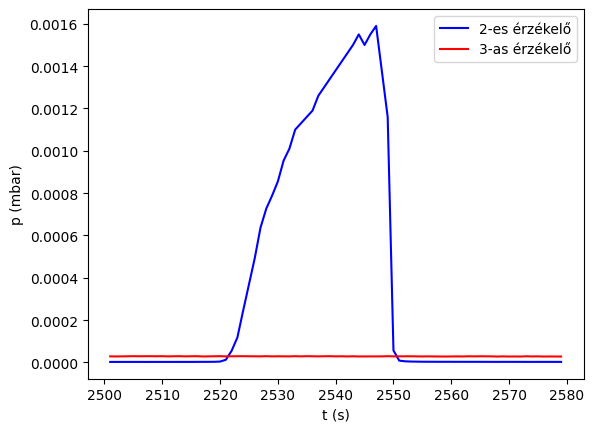

In [5]:
fig, ax = plt.subplots()
ax.plot(log2[0, (log2[0] < 2580) & (log2[0] > 2500)], log2[1, (log2[0] < 2580) & (log2[0] > 2500)], 'b-', label="2-es érzékelő")
ax.plot(log3[0, (log3[0] < 2580) & (log3[0] > 2500)], log3[1, (log3[0] < 2580) & (log3[0] > 2500)], 'r-', label="3-as érzékelő")
ax.set_xlabel(r't (s)')
ax.set_ylabel(r'p (mbar)')
ax.legend()
plt.savefig('leval.pdf', format='pdf', dpi=1000, bbox_inches='tight')

In [6]:
patl = log2[1, (log2[0] < 2510) & (log2[0] > 2460)].mean()
print(patl)
pmax = log2[1, (log2[0] < 2580) & (log2[0] > 2500)].max()
print(pmax)
print(pmax/patl)

2.7554545454545453e-06
0.00159
577.0372814252722


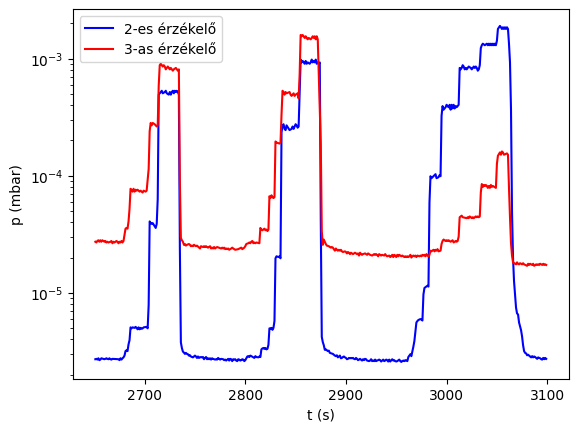

In [7]:
fig, ax = plt.subplots()
ax.semilogy(log2[0, (log2[0] < 3100) & (log2[0] > 2650)], log2[1, (log2[0] < 3100) & (log2[0] > 2650)], 'b-', label="2-es érzékelő")
ax.semilogy(log3[0, (log3[0] < 3100) & (log3[0] > 2650)], log3[1, (log3[0] < 3100) & (log3[0] > 2650)], 'r-', label="3-as érzékelő")
ax.set_xlabel(r't (s)')
ax.set_ylabel(r'p (mbar)')
ax.legend()
plt.savefig('3egyben.pdf', format='pdf', dpi=1000, bbox_inches='tight')

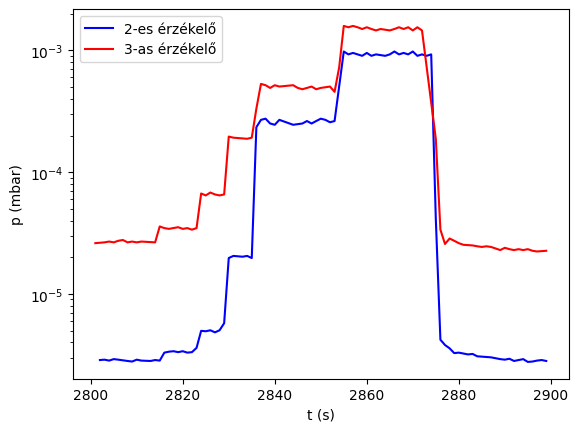

In [8]:
fig, ax = plt.subplots()
ax.semilogy(log2[0, (log2[0] < 2900) & (log2[0] > 2800)], log2[1, (log2[0] < 2900) & (log2[0] > 2800)], 'b-', label="2-es érzékelő")
ax.semilogy(log3[0, (log3[0] < 2900) & (log3[0] > 2800)], log3[1, (log3[0] < 2900) & (log3[0] > 2800)], 'r-', label="3-as érzékelő")
ax.set_xlabel(r't (s)')
ax.set_ylabel(r'p (mbar)')
ax.legend()
plt.savefig('3nyit1.pdf', format='pdf', dpi=1000, bbox_inches='tight')

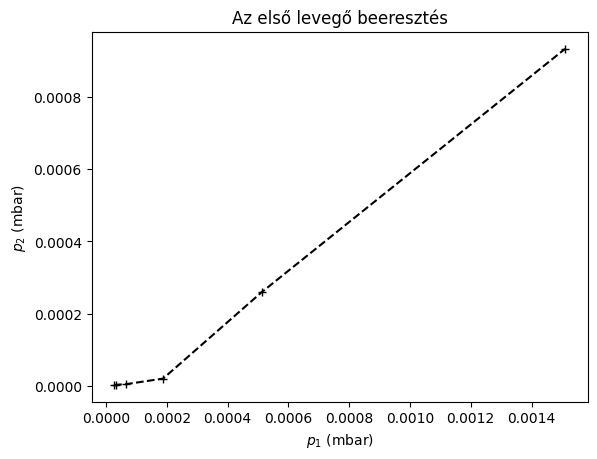

In [9]:
p2 = np.array([log2[1, (log2[0] < 2814) & (log2[0] > 2800)].mean(), log2[1, (log2[0] < 2823) & (log2[0] > 2817)].mean(), log2[1, (log2[0] < 2829) & (log2[0] > 2825)].mean(), log2[1, (log2[0] < 2835) & (log2[0] > 2831)].mean(), log2[1, (log2[0] < 2855) & (log2[0] > 2837)].mean(), log2[1, (log2[0] < 2872) & (log2[0] > 2857)].mean()])
p1 = np.array([log3[1, (log3[0] < 2814) & (log3[0] > 2800)].mean(), log3[1, (log3[0] < 2823) & (log3[0] > 2817)].mean(), log3[1, (log3[0] < 2829) & (log3[0] > 2825)].mean(), log3[1, (log3[0] < 2835) & (log3[0] > 2831)].mean(), log3[1, (log3[0] < 2855) & (log3[0] > 2837)].mean(), log3[1, (log3[0] < 2872) & (log3[0] > 2857)].mean()])
plt.plot(p1, p2, 'k--+')
plt.xlabel(r'$p_1$ (mbar)')
plt.ylabel(r'$p_2$ (mbar)')
plt.title('Az első levegő beeresztés')
plt.savefig('3plot1.pdf', format='pdf', dpi=1000, bbox_inches='tight')

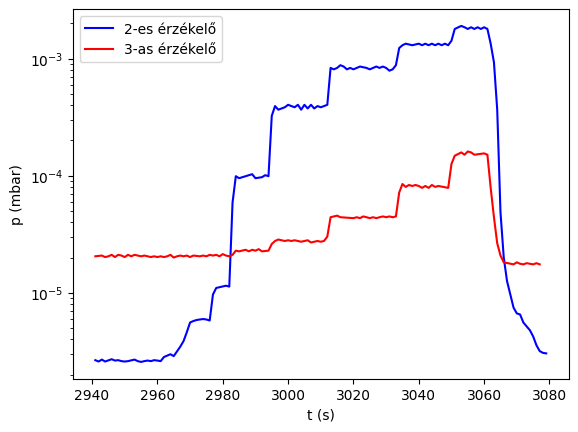

In [10]:
fig, ax = plt.subplots()
ax.semilogy(log2[0, (log2[0] < 3080) & (log2[0] > 2940)], log2[1, (log2[0] < 3080) & (log2[0] > 2940)], 'b-', label="2-es érzékelő")
ax.semilogy(log3[0, (log3[0] < 3080) & (log3[0] > 2940)], log3[1, (log3[0] < 3080) & (log3[0] > 2940)], 'r-', label="3-as érzékelő")
ax.set_xlabel(r't (s)')
ax.set_ylabel(r'p (mbar)')
ax.legend()
plt.savefig('3nyit2.pdf', format='pdf', dpi=1000, bbox_inches='tight')

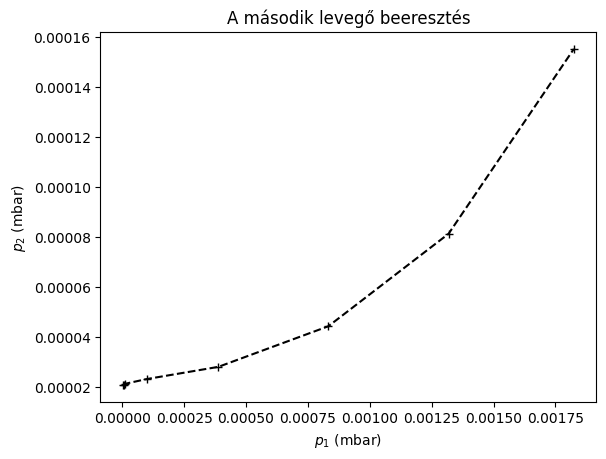

In [11]:
p1 = np.array([log2[1, (log2[0] < 2960) & (log2[0] > 2940)].mean(), log2[1, (log2[0] < 2977) & (log2[0] > 2971)].mean(), log2[1, (log2[0] < 2982) & (log2[0] > 2979)].mean(), log2[1, (log2[0] < 2993) & (log2[0] > 2984)].mean(), log2[1, (log2[0] < 3013) & (log2[0] > 2995)].mean(), log2[1, (log2[0] < 3033) & (log2[0] > 3015)].mean(), log2[1, (log2[0] < 3050) & (log2[0] > 3036)].mean(), log2[1, (log2[0] < 3061) & (log2[0] > 3053)].mean()])
p2 = np.array([log3[1, (log3[0] < 2960) & (log3[0] > 2940)].mean(), log3[1, (log3[0] < 2977) & (log3[0] > 2971)].mean(), log3[1, (log3[0] < 2982) & (log3[0] > 2979)].mean(), log3[1, (log3[0] < 2993) & (log3[0] > 2984)].mean(), log3[1, (log3[0] < 3013) & (log3[0] > 2995)].mean(), log3[1, (log3[0] < 3033) & (log3[0] > 3015)].mean(), log3[1, (log3[0] < 3050) & (log3[0] > 3036)].mean(), log3[1, (log3[0] < 3061) & (log3[0] > 3053)].mean()])
plt.plot(p1, p2, 'k--+')
plt.xlabel(r'$p_1$ (mbar)')
plt.ylabel(r'$p_2$ (mbar)')
plt.title('A második levegő beeresztés')
plt.savefig('3plot2.pdf', format='pdf', dpi=1000, bbox_inches='tight')